<a href="https://colab.research.google.com/github/rujool11/ML-learning/blob/main/05_Transfer_Learning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fine Tuning in Transfer Learning**

### **Getting helper functions**

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-10-14 09:35:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-14 09:35:06 (90.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# put reusable funcitons in a script you can download and use again
# now importing helper functions

from helper_functions import plot_loss_curves, walk_through_dir, unzip_data

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2023-10-14 09:35:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   211MB/s    in 0.8s    

2023-10-14 09:35:12 (211 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [5]:
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE,
                                                                            shuffle=True)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)

train_data_10_percent


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [7]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
train_data_10_percent.take

<bound method DatasetV2.take of <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>>

In [9]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[3.20000000e+01 1.00000000e+00 0.00000000e+00]
   [3.20000000e+01 1.00000000e+00 0.00000000e+00]
   [3.20000000e+01 1.00000000e+00 0.00000000e+00]
   ...
   [3.00000000e+01 1.01023209e+00 5.05116045e-01]
   [2.90000000e+01 0.00000000e+00 2.00000000e+00]
   [2.72295437e+01 5.40806353e-01 1.77038574e+00]]

  [[3.20000000e+01 1.00000000e+00 0.00000000e+00]
   [3.20000000e+01 1.00000000e+00 0.00000000e+00]
   [3.20000000e+01 1.00000000e+00 0.00000000e+00]
   ...
   [3.00714283e+01 0.00000000e+00 0.00000000e+00]
   [3.10714283e+01 9.38777387e-01 9.94897008e-01]
   [3.08111916e+01 1.38269043e+00 1.04591584e+00]]

  [[3.20000000e+01 1.00000000e+00 0.00000000e+00]
   [3.20000000e+01 1.00000000e+00 0.00000000e+00]
   [3.20000000e+01 1.00000000e+00 0.00000000e+00]
   ...
   [3.33571434e+01 0.00000000e+00 0.00000000e+00]
   [3.43010101e+01 9.28597450e-01 1.98976934e-01]
   [3.58622169e+01 3.28578377e+00 1.92346191e+00]]

  ...

  [[5.80714035e+01 4.28569698e+00 2.13262939e+00]
   [5

### **Functional API**


In [10]:
# We have been using the sequential API till now, the model below is created using the Functional API, functional API is more flexible

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False) # since we add dense layer on top, dont include top layer

# freeze base model so underlying patterns aren't updated during training

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')

# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)  # normalization layer, but efficient net has that built in

x = base_model(inputs)
print(f'shape after passing inputs through base model : {x.shape}')

# average pool the outputs (aggregate the most important information )

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'shape after global avg pooling 2D : {x.shape}')

outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
model_0 = tf.keras.Model(inputs, outputs)


24274472/24274472 [==============================] - 0s 0us/step
shape after passing inputs through base model : (None, 7, 7, 1280)
shape after global avg pooling 2D : (None, 1280)


In [11]:
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

hist_10_per = model_0.fit(train_data_10_percent,
                          epochs=5,
                          steps_per_epoch=len(train_data_10_percent),
                          validation_data=test_data,
                          validation_steps=int(0.25*len(test_data))) # since we have most test data, validate 0.25 to run quicker

Epoch 1/5
24/24 [==============================] - 121s 4s/step - loss: 1.9131 - accuracy: 0.3907 - val_loss: 1.3550 - val_accuracy: 0.7023
Epoch 2/5
24/24 [==============================] - 87s 4s/step - loss: 1.1672 - accuracy: 0.7107 - val_loss: 0.9067 - val_accuracy: 0.8306
Epoch 3/5
24/24 [==============================] - 85s 4s/step - loss: 0.8469 - accuracy: 0.8107 - val_loss: 0.7356 - val_accuracy: 0.8454
Epoch 4/5
24/24 [==============================] - 83s 4s/step - loss: 0.6987 - accuracy: 0.8387 - val_loss: 0.6266 - val_accuracy: 0.8569
Epoch 5/5
24/24 [==============================] - 84s 4s/step - loss: 0.5909 - accuracy: 0.8707 - val_loss: 0.5868 - val_accuracy: 0.8536


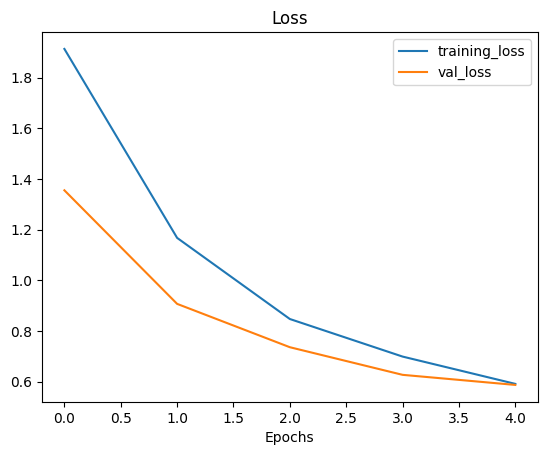

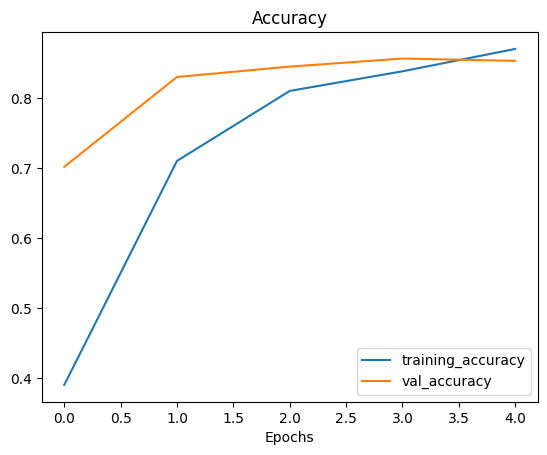

In [12]:
plot_loss_curves(hist_10_per)

In [14]:
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name) # prints all layers in efficient net model

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [15]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [16]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

In [58]:
import matplotlib.pyplot as plt
# change function to work for multiple models
def compare(names, histories):

  losses = []
  val_losses = []
  accuracies = []
  val_accuracies = []

  for history in histories:
    losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])

  epochs = range(len(losses[0]))

  for i in range(len(losses)):
    plt.plot(epochs, losses[i], label=names[i]+' loss')
    plt.plot(epochs, val_losses[i], label=names[i]+' validation loss')
  plt.xlabel('loss')
  plt.ylabel('epochs')
  plt.legend()

  plt.figure()
  for i in range(len(accuracies)):
    plt.plot(epochs, accuracies[i], label=names[i]+' accuracy')
    plt.plot(epochs, val_accuracies[i], label=names[i]+' validation accuracy')
  plt.xlabel('loss')
  plt.ylabel('epochs')
  plt.legend();

### **Getting feature vector from a trained model**

shape after base_model: (None, 7, 7, 1280)

shape after global avg pooling 2D : (None, 1280)

Lets use a similar tensor of shape (1, 4, 4, 3) and then pass to global average pooling layer



In [18]:
input_shape = (1, 4, 4, 3)
tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)
print(f'random input tensor: \n {input_tensor}')

# pass random tensor to global average pooled layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'global average pooled tensor: \n {global_average_pooled_tensor}')

print(f'shape of input tensor : {input_tensor.shape}')
print(f'shape of pooled tensor : {global_average_pooled_tensor.shape} ')

random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]
global average pooled tensor: 
 [[-0.09368646 -0.45840445 -0.28855976]]
shape of input tensor : (1, 4, 4, 3)
shape of pooled tensor : (1, 3) 


### **Feature vector**

learned representation of input data

transfer extraction experiments:

1. model_1 : feature extraction transfer learning and data augmentation with 1% of training data

2. model_2 : feature extraction transfer learning and data augmentation with 10% of training data

2. model_3 : fine tuning transfer learning and data augmentation with 10% of training data

2. model_4 : fine tuning transfer learning and data augmentation with 100% of training data

In [19]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2023-10-14 09:45:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   142MB/s    in 0.9s    

2023-10-14 09:45:26 (142 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
train_dir_1_percent = '10_food_classes_1_percent/train/'
test_dir = '10_food_classes_1_percent/test/' # same test dir used everywhere

In [21]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

In [22]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           shuffle=True)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### **Adding data augmentation layer**



In [23]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    # preprocessing.rescale(1./255), efficientnet already rescales, so commented out
], name='data_augmentation')



chicken_wings


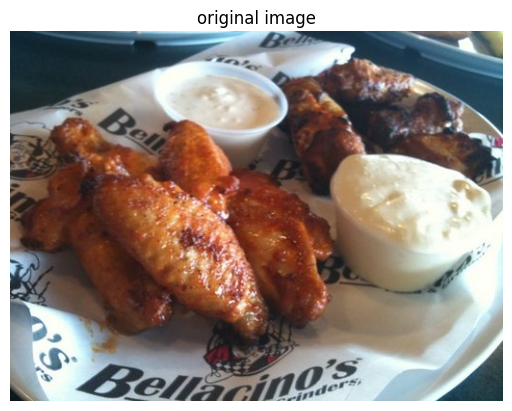

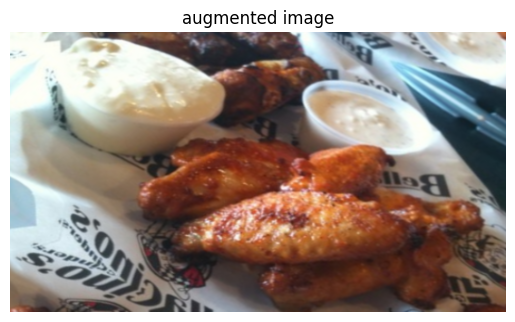

In [24]:
import os
import random
import matplotlib.image as mpimg

target_class = random.choice(train_data_1_percent.class_names)
target_dir = train_dir_1_percent + target_class
print(target_class)
random_img = random.choice(os.listdir(target_dir))
random_img_path = target_dir + '/' + random_img
img = mpimg.imread(random_img_path)
plt.axis(False)
plt.title('original image')
plt.imshow(img)
aug_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.title('augmented image')
plt.axis(False)
plt.imshow(tf.squeeze(aug_img)/255.)

### **Model 1: feature extractor with 1% augmented data**

In [25]:
# making model_1 with 1% augmented data and feature extraction
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False) # dont train it since feature extraction

x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layre')(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

hist_1 = model_1.fit(train_data_1_percent,
            epochs=5,
            steps_per_epoch=len(train_data_1_percent),
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)))

Epoch 1/5
3/3 [==============================] - 57s 23s/step - loss: 2.3670 - accuracy: 0.0286 - val_loss: 2.2443 - val_accuracy: 0.1283
Epoch 2/5
3/3 [==============================] - 39s 18s/step - loss: 2.1958 - accuracy: 0.1714 - val_loss: 2.1198 - val_accuracy: 0.2434
Epoch 3/5
3/3 [==============================] - 39s 19s/step - loss: 2.0195 - accuracy: 0.3286 - val_loss: 2.0211 - val_accuracy: 0.3322
Epoch 4/5
3/3 [==============================] - 46s 22s/step - loss: 1.8643 - accuracy: 0.4571 - val_loss: 1.9484 - val_accuracy: 0.3783
Epoch 5/5
3/3 [==============================] - 45s 22s/step - loss: 1.6426 - accuracy: 0.6143 - val_loss: 1.8779 - val_accuracy: 0.4145


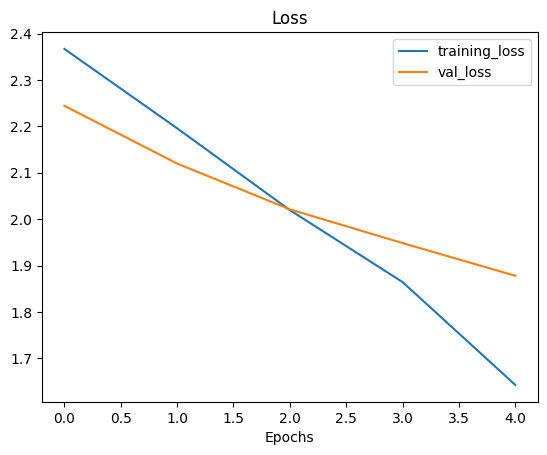

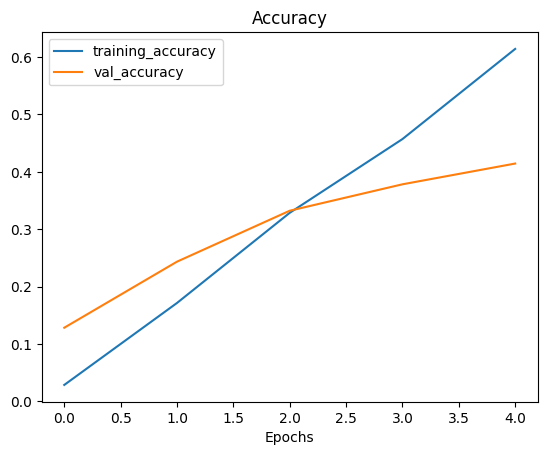

In [26]:
plot_loss_curves(hist_1)

In [27]:
res_model_1 = model_1.evaluate(test_data)
res_model_1

79/79 [==============================] - 137s 2s/step - loss: 1.8599 - accuracy: 0.4388


[1.8598846197128296, 0.43880000710487366]

### **Model 2: Feature extractor with 10% augmented data**

In [28]:
# model_2 feature extractor model with 10% augmented data
train_dir_10_percent = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode='categorical',
                                                                            shuffle=True,
                                                                            image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.


In [62]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False) # pass x to base model but keep in inference mode, also ensures that batch normalization (batchnorm) layers dont get updated
# batch norm layers should not be changed during fine tuning
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) # layer ususally takes input outside bracket, model inside bracket
outputs = layers.Dense(10, activation='softmax')(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [63]:
# model checkpoint callback - saves your model as it trains, save weights and biases
checkpoint_path = 'model_2_checkpoint_weights/checkpoint.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # only saving weights
                                                         save_best_only=False, # if True, will save only best performing weights
                                                         save_freq='epoch', # save for every epoch
                                                         verbose=1)

In [64]:
# fitting model using modelcheckpoint callback
initial_epochs = 5
hist_2 = model_2.fit(train_data_10_percent,
                     epochs=initial_epochs,
                     steps_per_epoch=len(train_data_10_percent),
                     validation_data=test_data,
                     validation_steps=int(0.25*len(test_data)),
                     callbacks=[checkpoint_callback])


Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0740 - accuracy: 0.2987
Epoch 1: saving model to model_2_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 101s 4s/step - loss: 2.0740 - accuracy: 0.2987 - val_loss: 1.5647 - val_accuracy: 0.6184
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4282 - accuracy: 0.6453
Epoch 2: saving model to model_2_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 91s 4s/step - loss: 1.4282 - accuracy: 0.6453 - val_loss: 1.1392 - val_accuracy: 0.7155
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1290 - accuracy: 0.7133
Epoch 3: saving model to model_2_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 89s 4s/step - loss: 1.1290 - accuracy: 0.7133 - val_loss: 0.9222 - val_accuracy: 0.7434
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9773 - accuracy: 0.7507
Epoch 4: saving model to model_2_che

In [65]:
res_model_2 = model_2.evaluate(test_data)

79/79 [==============================] - 130s 2s/step - loss: 0.6791 - accuracy: 0.8132


In [66]:
# load weights saved using model checkpoint callback

model_2.load_weights(checkpoint_path)
res_model_2_loaded = model_2.evaluate(test_data)

79/79 [==============================] - 131s 2s/step - loss: 0.6791 - accuracy: 0.8132


In [67]:
res_model_2, res_model_2_loaded # very close, not exact due to different precision in storing

([0.6791273951530457, 0.8131999969482422],
 [0.6791273951530457, 0.8131999969482422])

### **Model 3: Fine tuning with 10% augmented data**

fine tuning usually works better after training a feature extractor model for a few epochs with large amounts of custom data
model_2 is trained for 5 epochs, now we will use the loaded weights to fine tune model_3

In [68]:
# lower layers generally learn larger features, which are usually pretty good, and we keep them frozen
# we unfreeze the upper (later) layers, which usually learn more specific features
model_2.layers

In [69]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7d5bc46a22f0> True
<keras.src.engine.sequential.Sequential object at 0x7d5bd4a70dc0> True
<keras.src.engine.functional.Functional object at 0x7d5bc42c9180> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7d5bc46a1b70> True
<keras.src.layers.core.dense.Dense object at 0x7d5bc43b70a0> True


In [70]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, ': ', layer.trainable)

0 input_4 :  False
1 rescaling_3 :  False
2 normalization_3 :  False
3 stem_conv :  False
4 stem_bn :  False
5 stem_activation :  False
6 block1a_project_conv :  False
7 block1a_project_bn :  False
8 block1a_project_activation :  False
9 block2a_expand_conv :  False
10 block2a_expand_bn :  False
11 block2a_expand_activation :  False
12 block2a_project_conv :  False
13 block2a_project_bn :  False
14 block2b_expand_conv :  False
15 block2b_expand_bn :  False
16 block2b_expand_activation :  False
17 block2b_project_conv :  False
18 block2b_project_bn :  False
19 block2b_drop :  False
20 block2b_add :  False
21 block3a_expand_conv :  False
22 block3a_expand_bn :  False
23 block3a_expand_activation :  False
24 block3a_project_conv :  False
25 block3a_project_bn :  False
26 block3b_expand_conv :  False
27 block3b_expand_bn :  False
28 block3b_expand_activation :  False
29 block3b_project_conv :  False
30 block3b_project_bn :  False
31 block3b_drop :  False
32 block3b_add :  False
33 block4a_

In [71]:
print(len(model_2.layers[2].trainable_variables)) # as we can see, no trainable variables

0


In [72]:
# to begin fine tuning, set last 10 layers of base_model as trainable (model_2.layers[2] is just the base model)
base_model.trainable = True

# freeze all layers except last 10

for layer in base_model.layers[:-10]:
  layer.trainable = False

for i,layer in enumerate(base_model.layers):
  print(i, layer.name, ': ', layer.trainable)

0 input_4 :  False
1 rescaling_3 :  False
2 normalization_3 :  False
3 stem_conv :  False
4 stem_bn :  False
5 stem_activation :  False
6 block1a_project_conv :  False
7 block1a_project_bn :  False
8 block1a_project_activation :  False
9 block2a_expand_conv :  False
10 block2a_expand_bn :  False
11 block2a_expand_activation :  False
12 block2a_project_conv :  False
13 block2a_project_bn :  False
14 block2b_expand_conv :  False
15 block2b_expand_bn :  False
16 block2b_expand_activation :  False
17 block2b_project_conv :  False
18 block2b_project_bn :  False
19 block2b_drop :  False
20 block2b_add :  False
21 block3a_expand_conv :  False
22 block3a_expand_bn :  False
23 block3a_expand_activation :  False
24 block3a_project_conv :  False
25 block3a_project_bn :  False
26 block3b_expand_conv :  False
27 block3b_expand_bn :  False
28 block3b_expand_activation :  False
29 block3b_project_conv :  False
30 block3b_project_bn :  False
31 block3b_drop :  False
32 block3b_add :  False
33 block4a_

In [73]:
# recompile model everytime you change it

'''
 because we are updating already learned rates,
 we dont want them to change/update too much, so change the learning rate by
10 x (usually), is a trainable hyperparamter)
'''
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])


In [74]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, ': ', layer.trainable)

0 input_4 :  False
1 rescaling_3 :  False
2 normalization_3 :  False
3 stem_conv :  False
4 stem_bn :  False
5 stem_activation :  False
6 block1a_project_conv :  False
7 block1a_project_bn :  False
8 block1a_project_activation :  False
9 block2a_expand_conv :  False
10 block2a_expand_bn :  False
11 block2a_expand_activation :  False
12 block2a_project_conv :  False
13 block2a_project_bn :  False
14 block2b_expand_conv :  False
15 block2b_expand_bn :  False
16 block2b_expand_activation :  False
17 block2b_project_conv :  False
18 block2b_project_bn :  False
19 block2b_drop :  False
20 block2b_add :  False
21 block3a_expand_conv :  False
22 block3a_expand_bn :  False
23 block3a_expand_activation :  False
24 block3a_project_conv :  False
25 block3a_project_bn :  False
26 block3b_expand_conv :  False
27 block3b_expand_bn :  False
28 block3b_expand_activation :  False
29 block3b_project_conv :  False
30 block3b_project_bn :  False
31 block3b_drop :  False
32 block3b_add :  False
33 block4a_

In [75]:
print(len(model_2.layers[2].trainable_variables))

10


In [76]:
# fine tune for 5 epochs
fine_tune_epochs = initial_epochs + 5

hist_3 = model_2.fit(train_data_10_percent,
                     epochs=fine_tune_epochs,
                     steps_per_epoch=len(train_data_10_percent),
                     validation_data=test_data,
                     validation_steps=int(0.25*len(test_data)),
                     initial_epoch=hist_2.epoch[-1]+1) # start training from previous last epoch

Epoch 6/10
24/24 [==============================] - 109s 4s/step - loss: 0.7411 - accuracy: 0.7960 - val_loss: 0.5573 - val_accuracy: 0.8289
Epoch 7/10
24/24 [==============================] - 92s 4s/step - loss: 0.6129 - accuracy: 0.8160 - val_loss: 0.5193 - val_accuracy: 0.8240
Epoch 8/10
24/24 [==============================] - 94s 4s/step - loss: 0.5624 - accuracy: 0.8267 - val_loss: 0.5011 - val_accuracy: 0.8372
Epoch 9/10
24/24 [==============================] - 93s 4s/step - loss: 0.5307 - accuracy: 0.8307 - val_loss: 0.4886 - val_accuracy: 0.8405
Epoch 10/10
24/24 [==============================] - 93s 4s/step - loss: 0.5013 - accuracy: 0.8373 - val_loss: 0.4706 - val_accuracy: 0.8438


In [77]:
res_model_3 = model_2.evaluate(test_data)

79/79 [==============================] - 131s 2s/step - loss: 0.4471 - accuracy: 0.8488


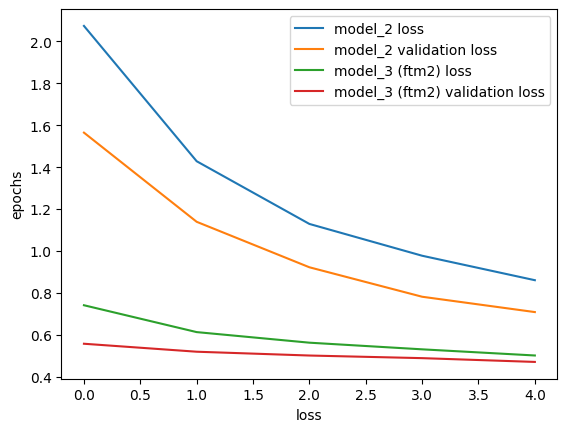

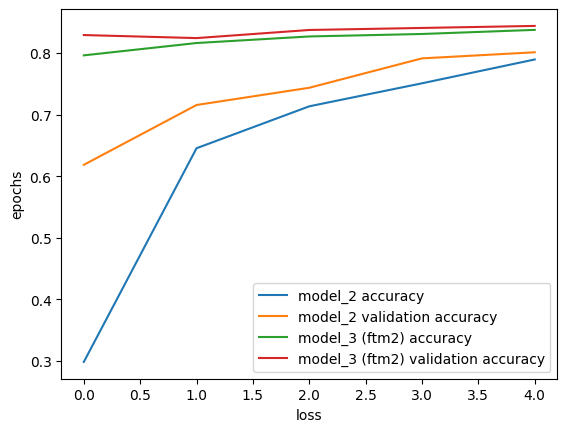

In [79]:
compare(['model_2', 'model_3 (ftm2)'], [hist_2, hist_3]) # model_3 is trained from model_2 so its starting accuracy with naturally be higher

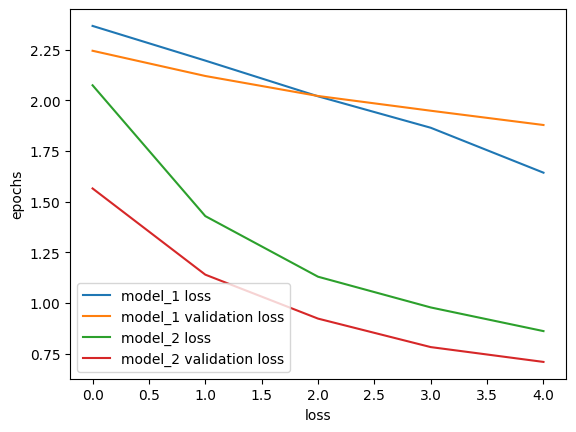

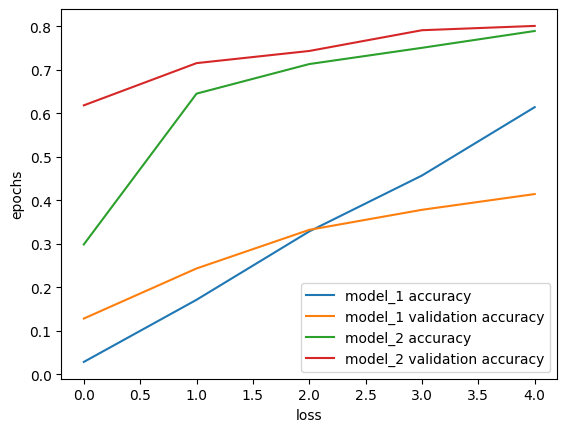

In [80]:
compare(['model_1', 'model_2'], [hist_1, hist_2])